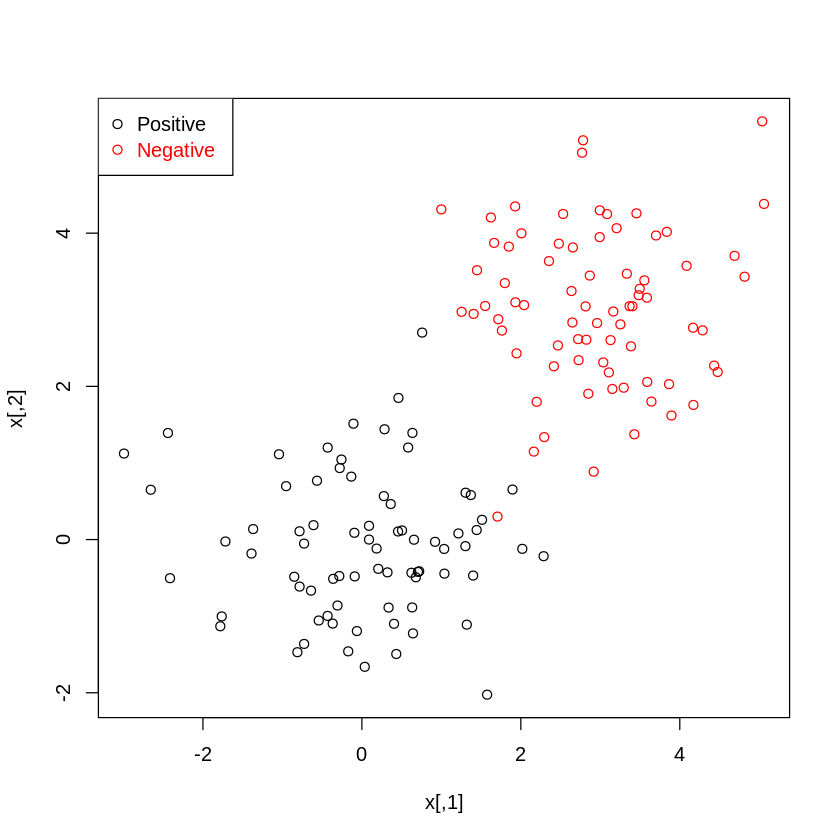

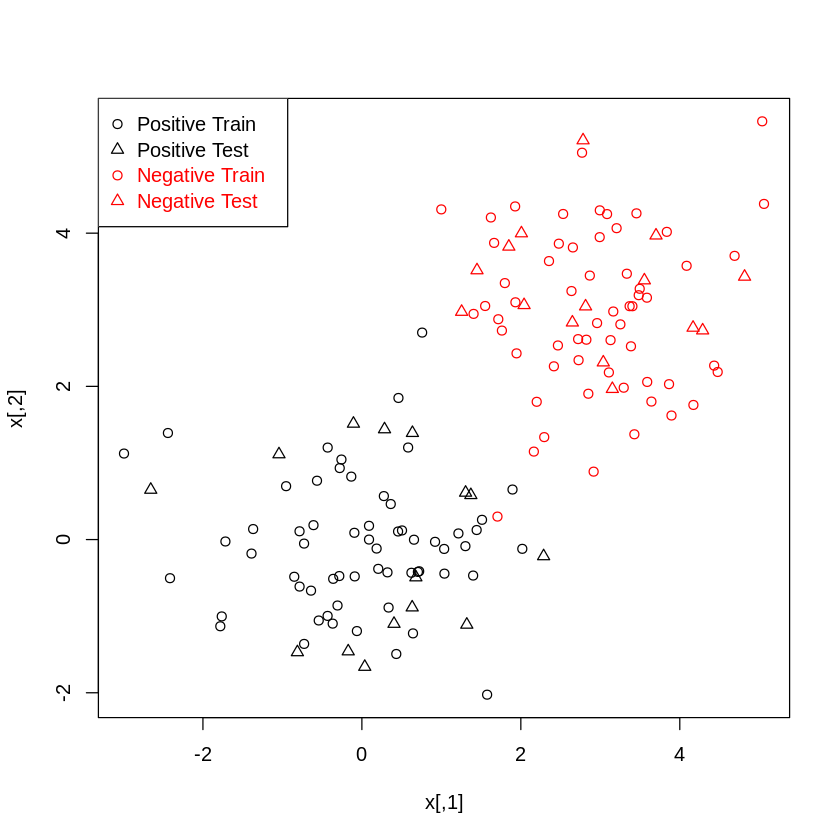

In [1]:
source("create_dataset.r")

 Setting default kernel parameters  


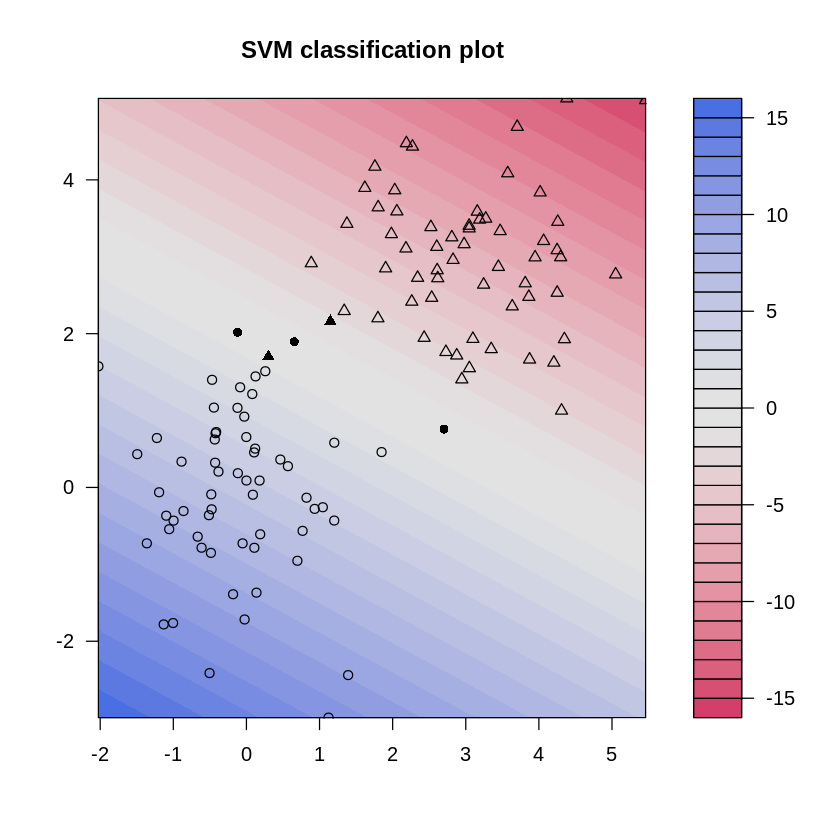

In [2]:
library(kernlab)
svp <- ksvm(xtrain, ytrain, type = "C-svc", kernel="vanilladot", C=100, scalled=c())

#svp
#attributes(svp)

#coef(svp)
#alphaindex(svp)
#b(svp)

# Use the built-in function to pretty-plot the classifier
plot(svp,data=xtrain)


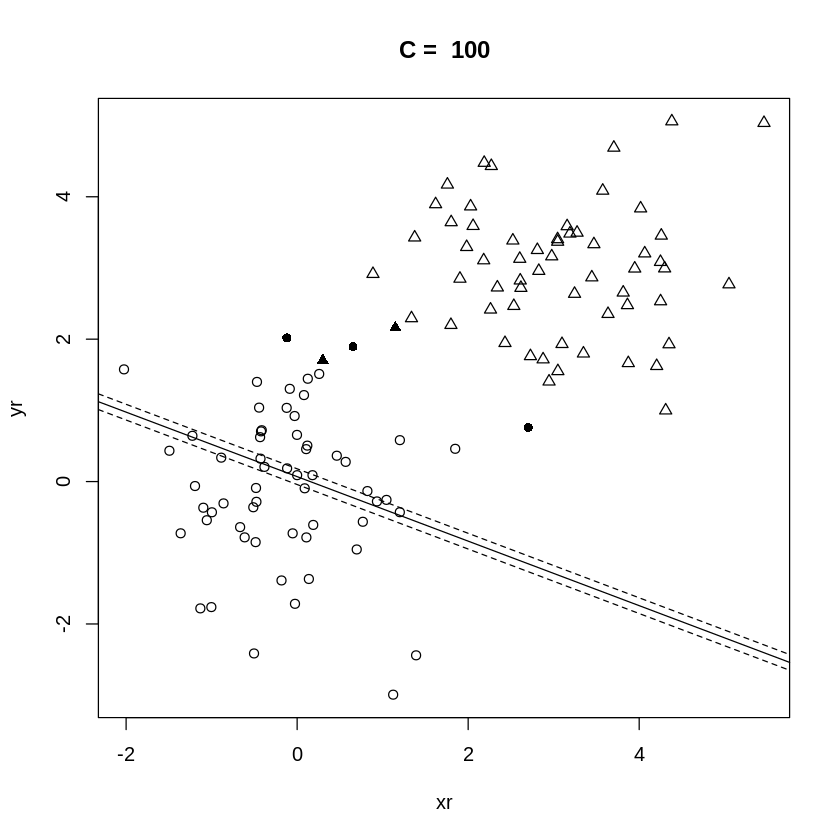

In [3]:

# Define the range of the plot
# First column is plotted vertically
plotDecisionBoundary = function(svp, xtrain){
	yr <- c(min(xtrain[,1]), max(xtrain[,1]))
	# Second column is plotted horizontally
	xr <- c(min(xtrain[,2]), max(xtrain[,2]))

	# Plot the points of xtrain with different signs for positive/negative and SV/non SV
	plot(xr,yr,type='n')
	ymat <- ymatrix(svp)
	points(xtrain[-SVindex(svp),2], xtrain[-SVindex(svp),1], pch = ifelse(ymat[-SVindex(svp)] < 0, 2, 1))
	points(xtrain[SVindex(svp),2], xtrain[SVindex(svp),1], pch = ifelse(ymat[SVindex(svp)] < 0, 17, 16))

	# Extract w and b from the model	
	w <- colSums(coef(svp)[[1]] * xtrain[SVindex(svp),])
	b <- b(svp)

	# Draw the lines 
	abline(b/w[1],-w[2]/w[1])
	abline((b+1)/w[1],-w[2]/w[1],lty=2)
	abline((b-1)/w[1],-w[2]/w[1],lty=2)

	title(main=paste("C = ", toString(param(svp)$C)))
}


plotDecisionBoundary(svp, xtrain)

In [4]:


########## PREDICT WITH SVM #############
# Predict labels on test
ypred = predict(svp,xtest)
as.matrix(table(Actual = ytest, Predicted = ypred))

# Compute accuracy
sum(ypred==ytest)/length(ytest)
# Compute at the prediction scores
ypredscore = predict(svp,xtest,type="decision")
# Check that the predicted labels are the signs of the scores
table(ypredscore > 0,ypred)

      Predicted
Actual -1  1
    -1 15  0
    1   0 15

[1] 1

       ypred
        -1  1
  FALSE 15  0
  TRUE   0 15

 Setting default kernel parameters  


[1] 0.025

 Setting default kernel parameters  
 Setting default kernel parameters  


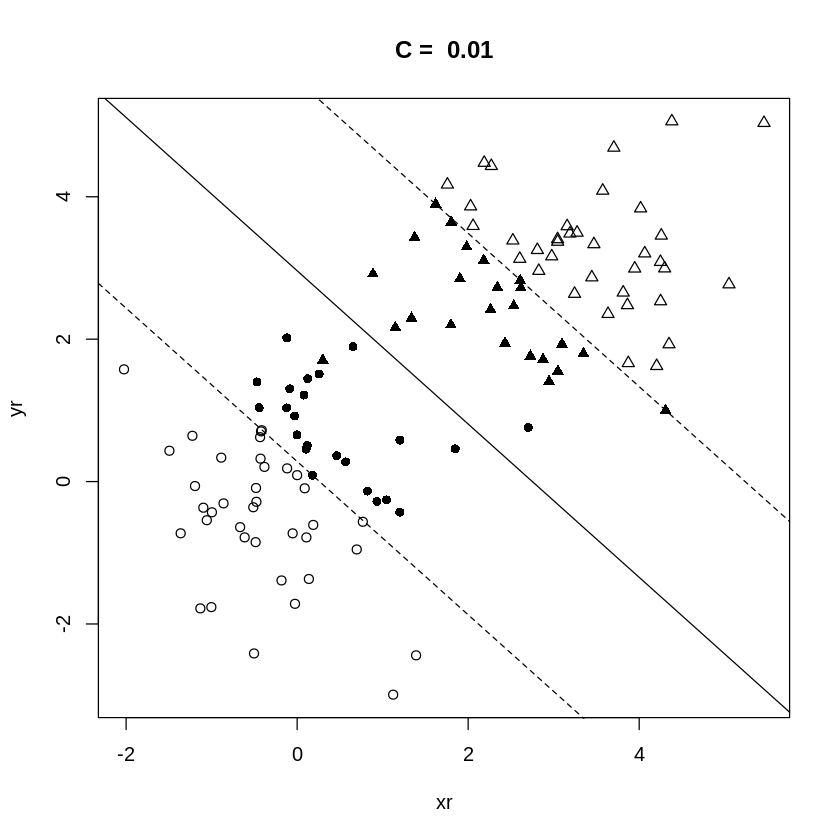

 Setting default kernel parameters  


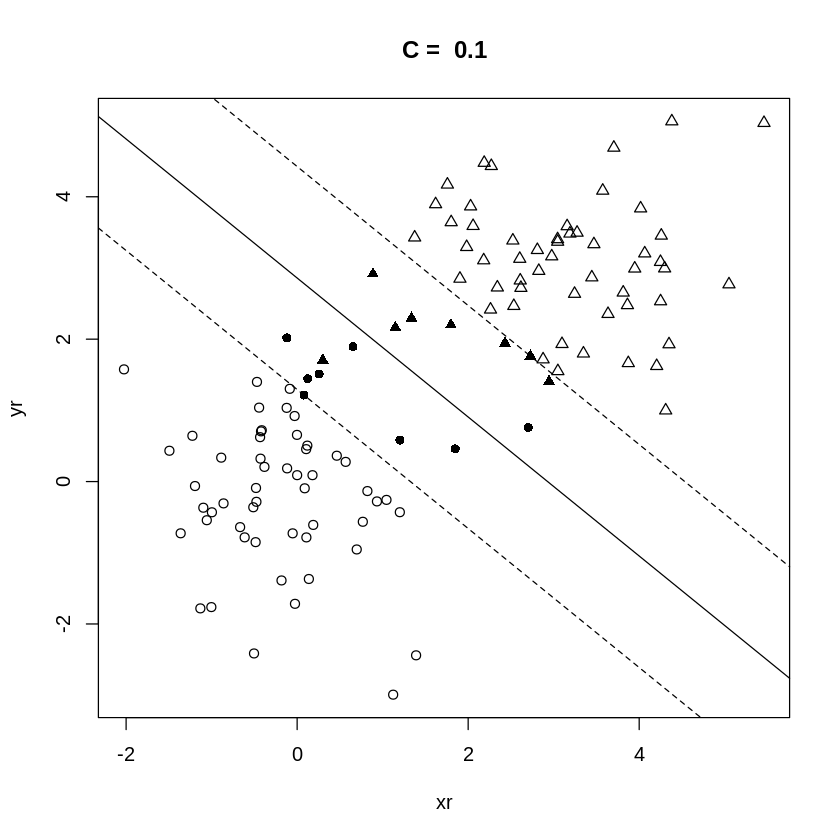

 Setting default kernel parameters  


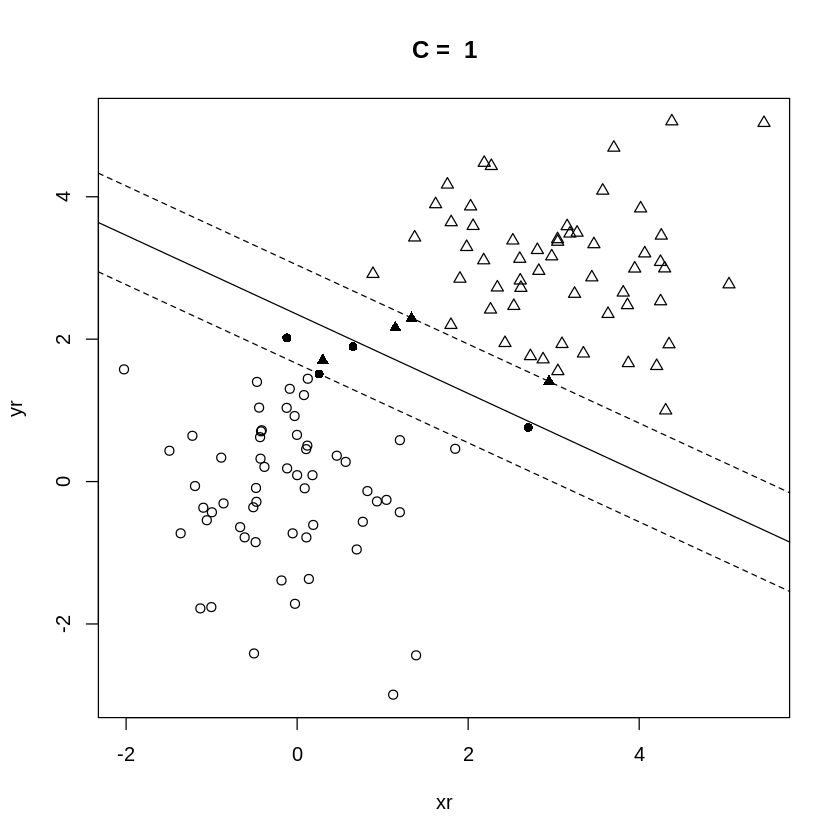

 Setting default kernel parameters  


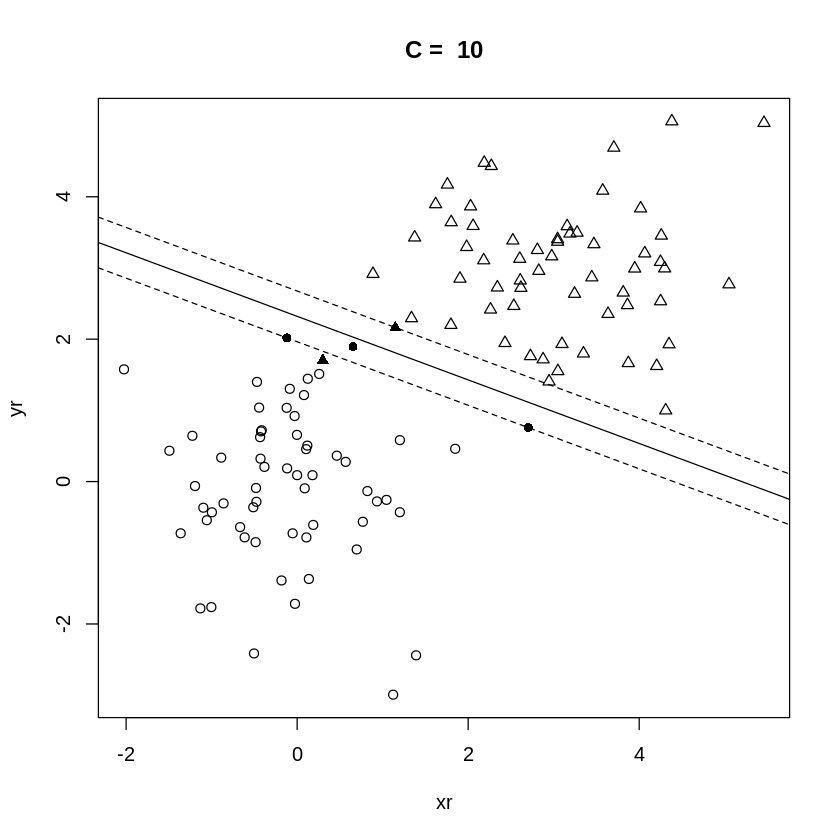

 Setting default kernel parameters  


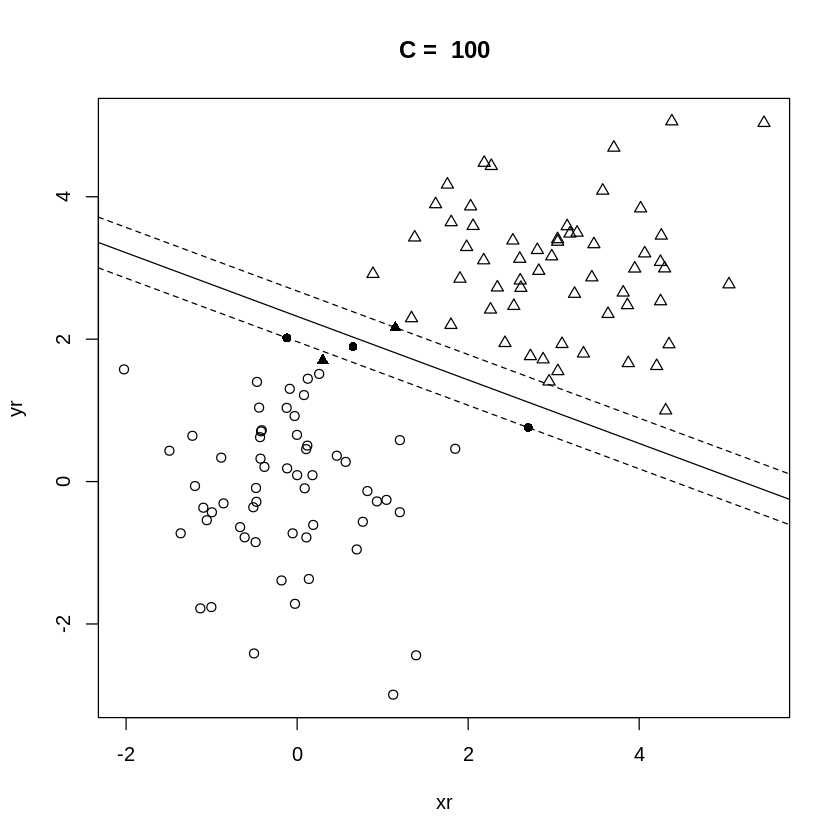

 Setting default kernel parameters  


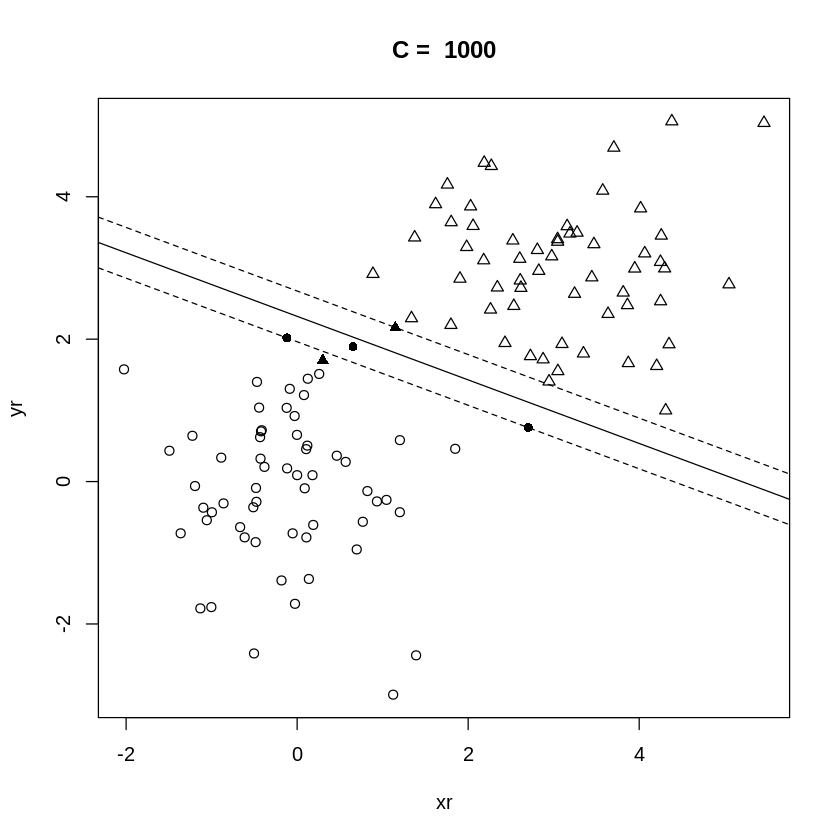

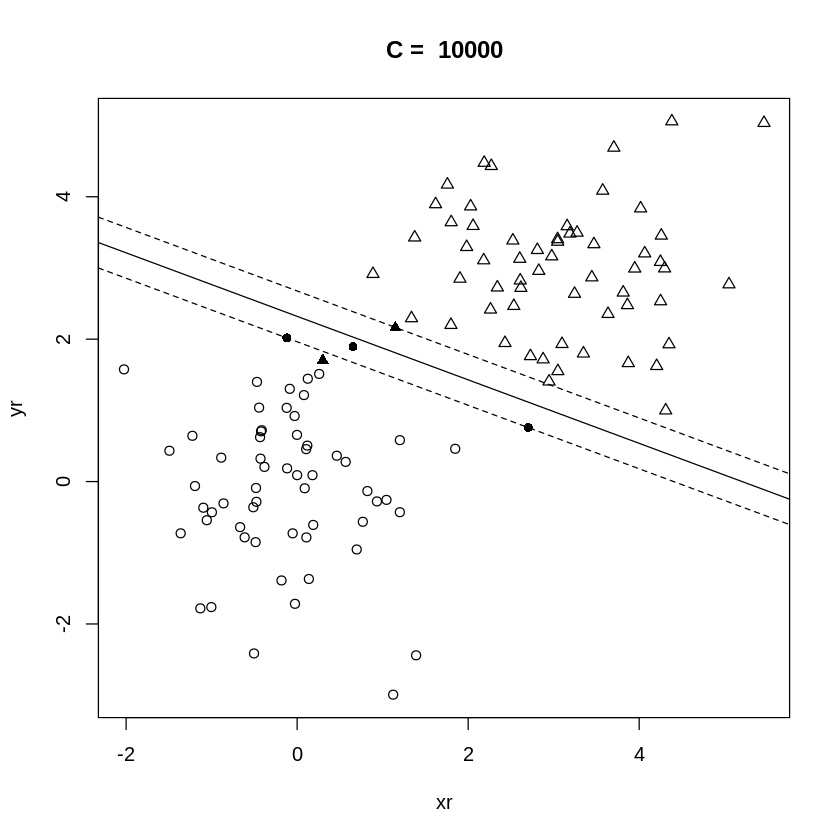

In [6]:


######## CROSS-VALIDATION SVM ############
svp <- ksvm(xtrain,ytrain,type="C-svc",kernel="vanilladot",C=100,scaled=c(), cross=5)
cross(svp)



####### INFLUENCE OF C #############
CList = 10^seq(-2,4)

par(ask=T)

for (C in CList){
	svp <- ksvm(xtrain,ytrain,type="C-svc",kernel="vanilladot",C=C,scaled=c())

	plotDecisionBoundary(svp,xtrain)
}

par(ask=F)

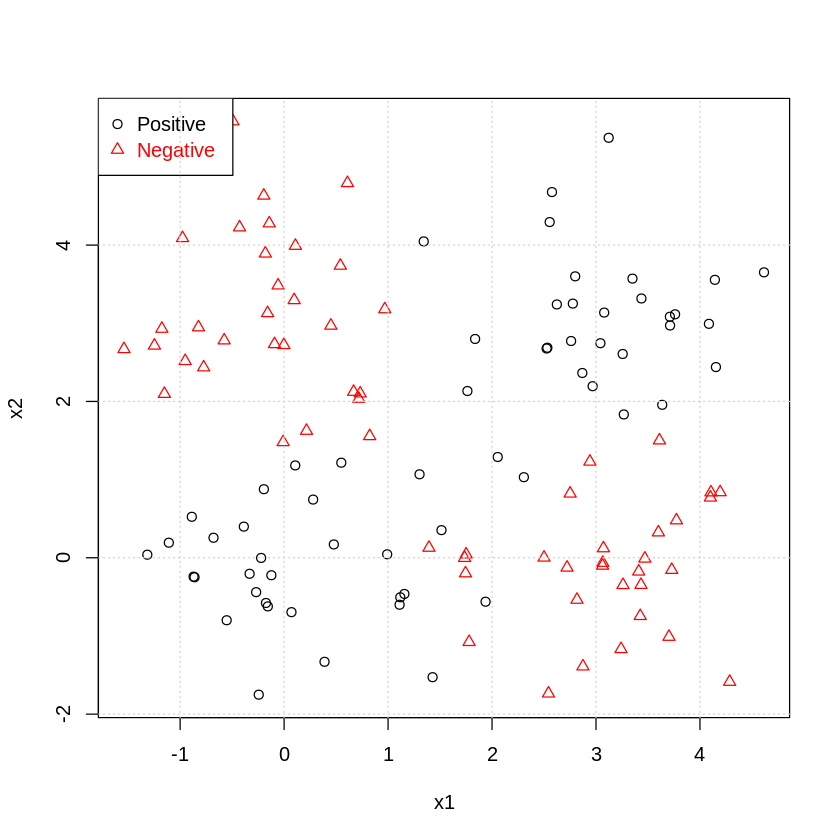

In [7]:

########## Non-linear SVM #################
plot(nlx,col=ifelse(nly>0,1,2),pch=ifelse(nly>0,1,2))
legend("topleft",c('Positive','Negative'),col=c(1,2),pch=c(1,2),text.col=c(1,2))
grid()

 Setting default kernel parameters  
 Setting default kernel parameters  


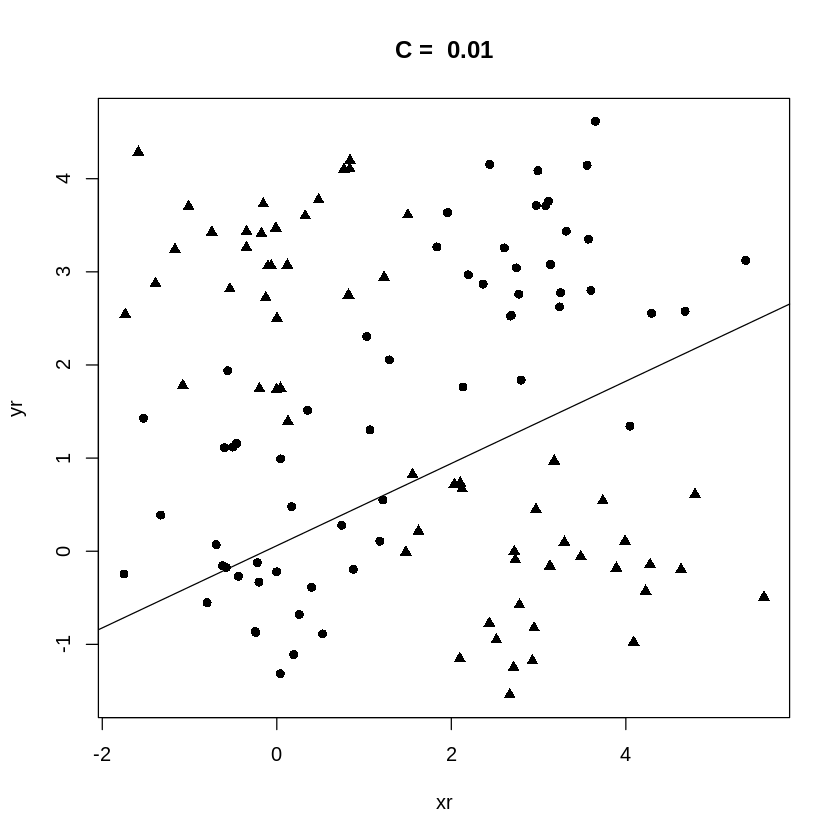

 Setting default kernel parameters  


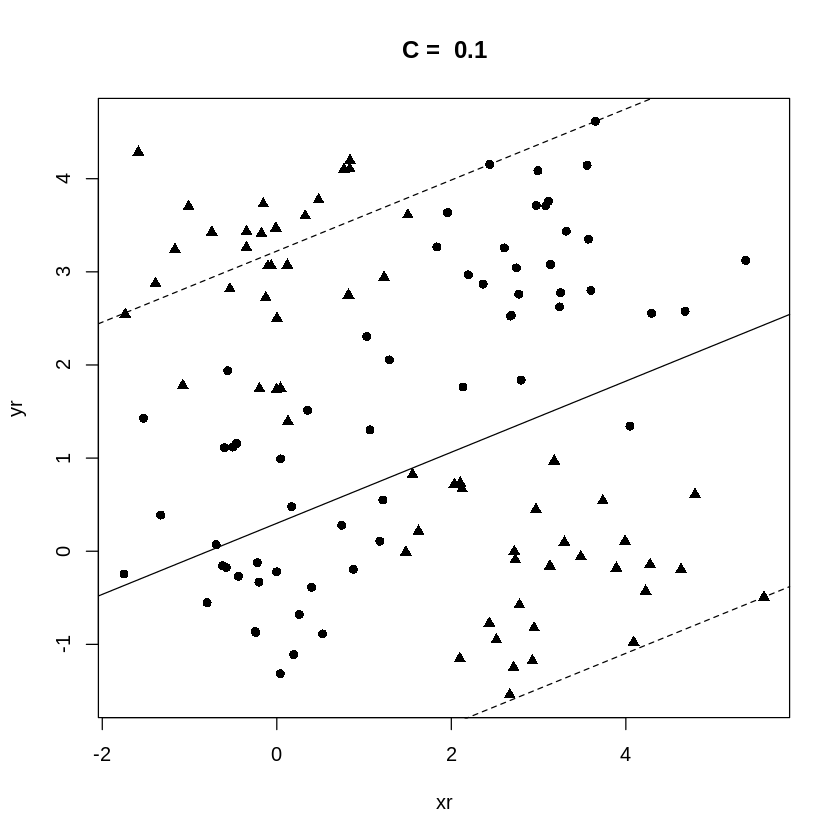

 Setting default kernel parameters  


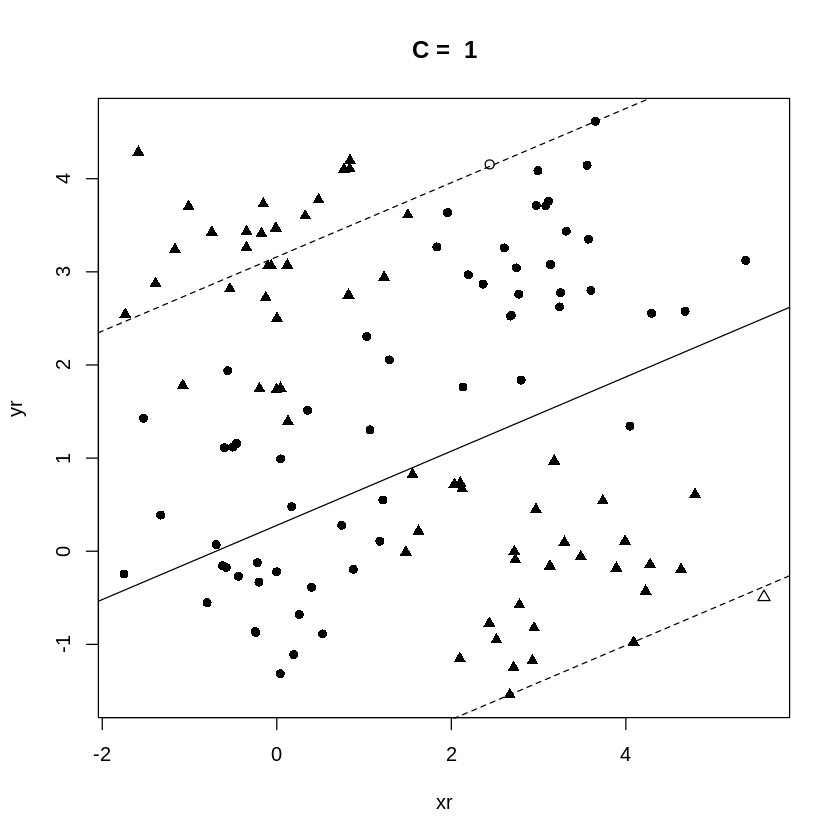

 Setting default kernel parameters  


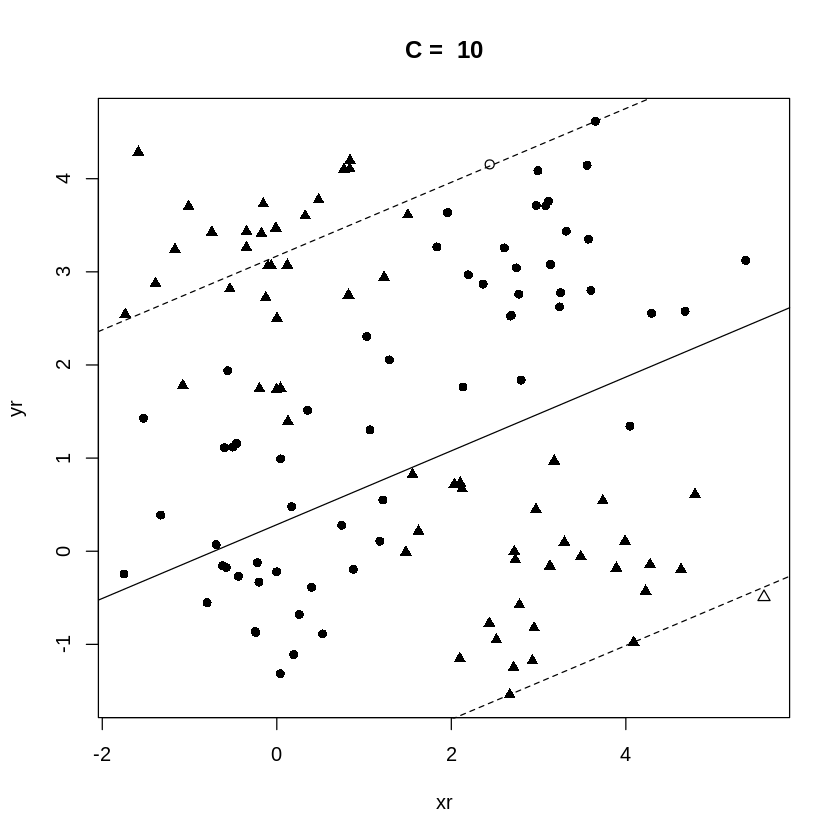

 Setting default kernel parameters  


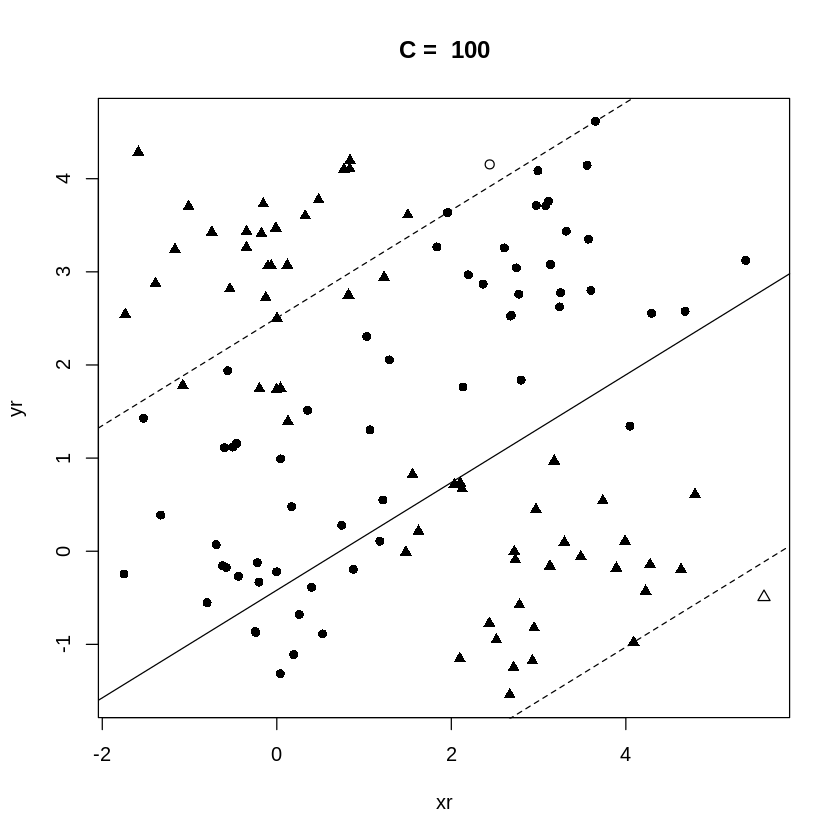

 Setting default kernel parameters  


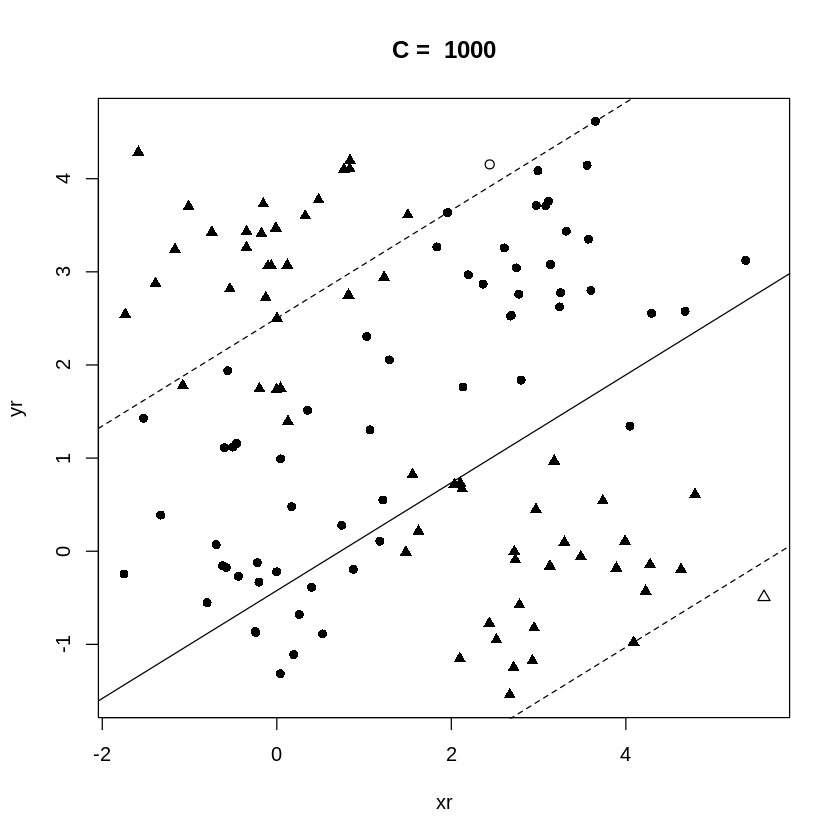

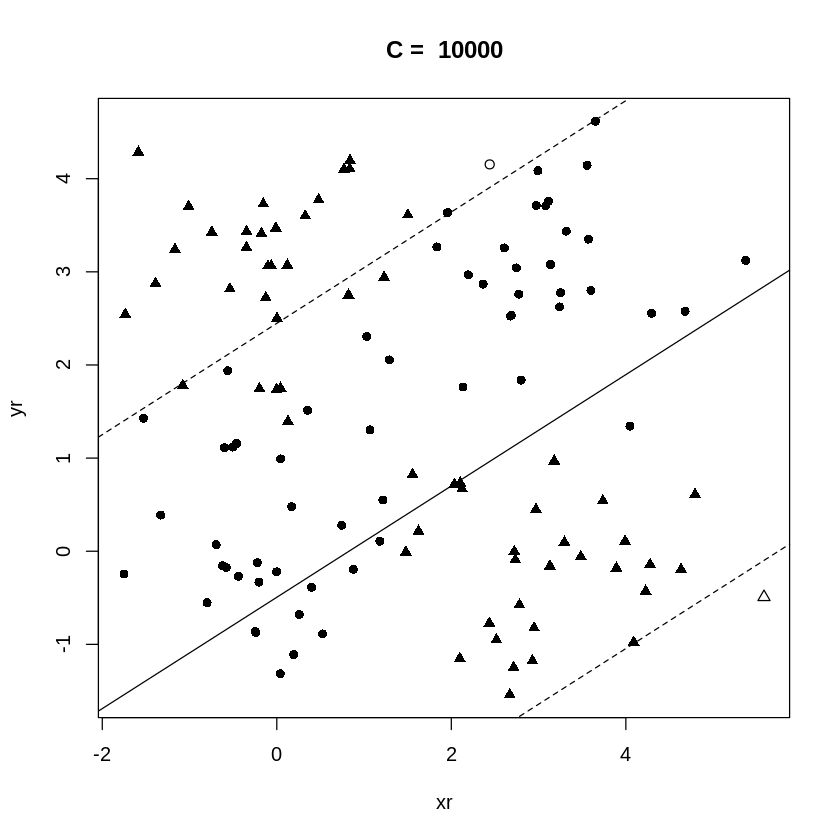

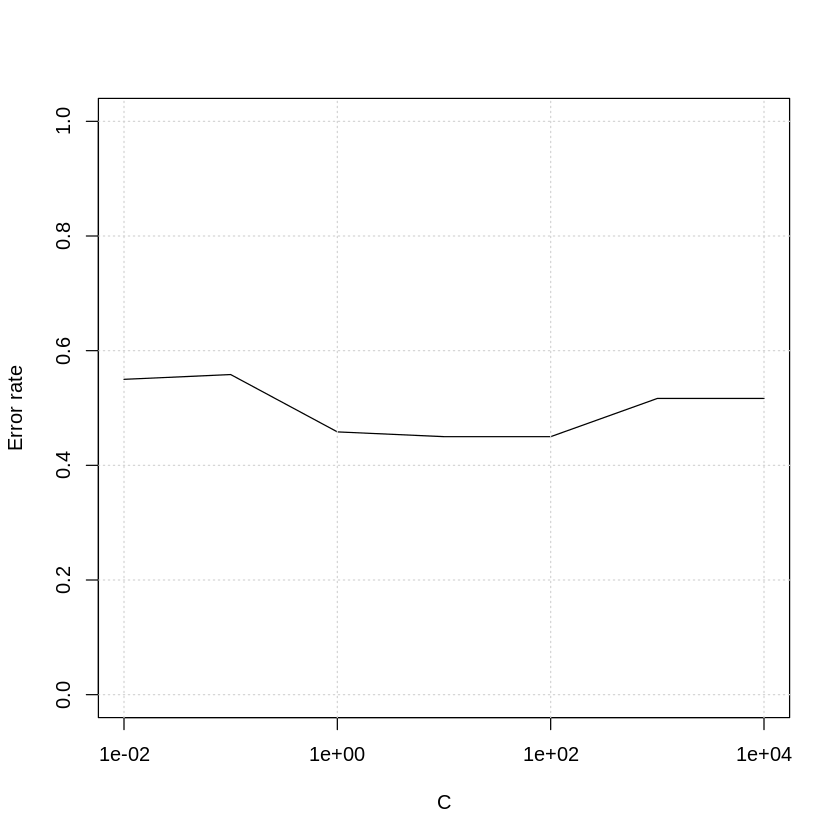

In [8]:


#let's use a linear SVM
par(ask=T)

errlin <- numeric(length(CList))
for (i in seq(length(CList))) {
	svp <- ksvm(nlx,nly,type="C-svc",kernel="vanilladot",C=CList[i],scaled=c(), cross=5)

	plotDecisionBoundary(svp,nlx)
	errlin[i] <- cross(svp)
}


# Plot the CV error as a function of C
plot(CList,errlin,type='l',log="x",ylim=c(0,1),xlab="C",ylab="Error rate")
grid()

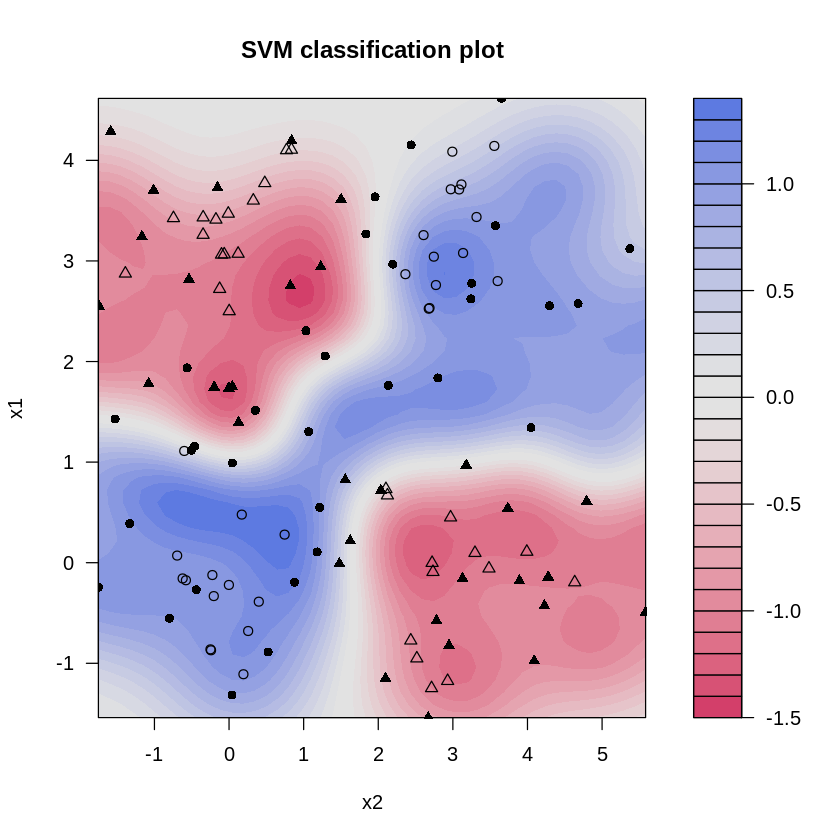

In [9]:



# Now with a RBF kernel and default parameters
svp <- ksvm(nlx,nly,type="C-svc",kernel='rbf')
plot(svp,data=nlx)

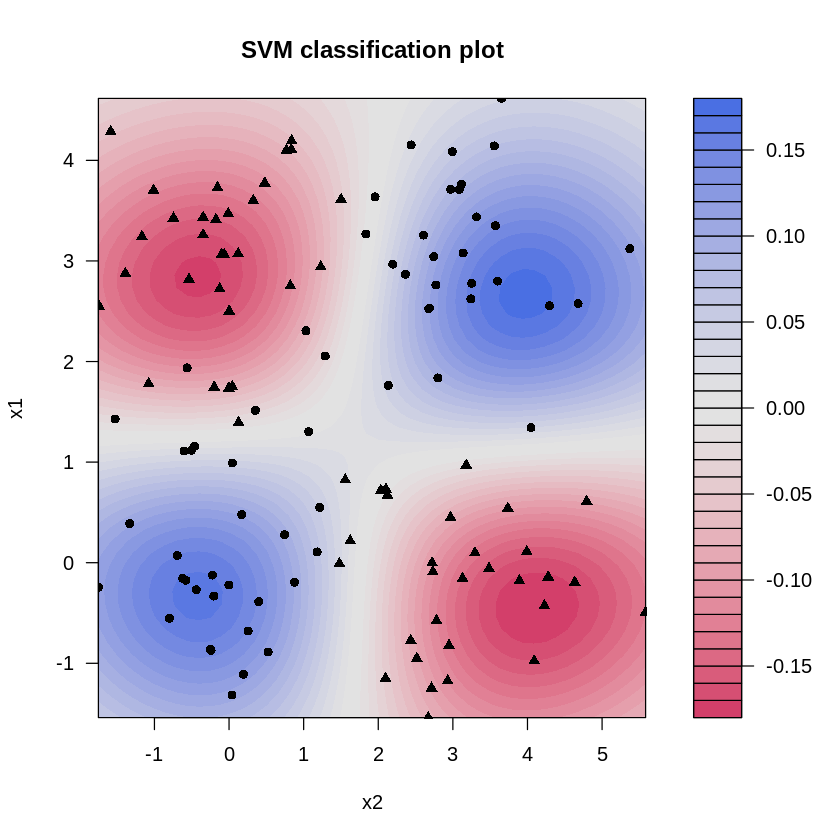

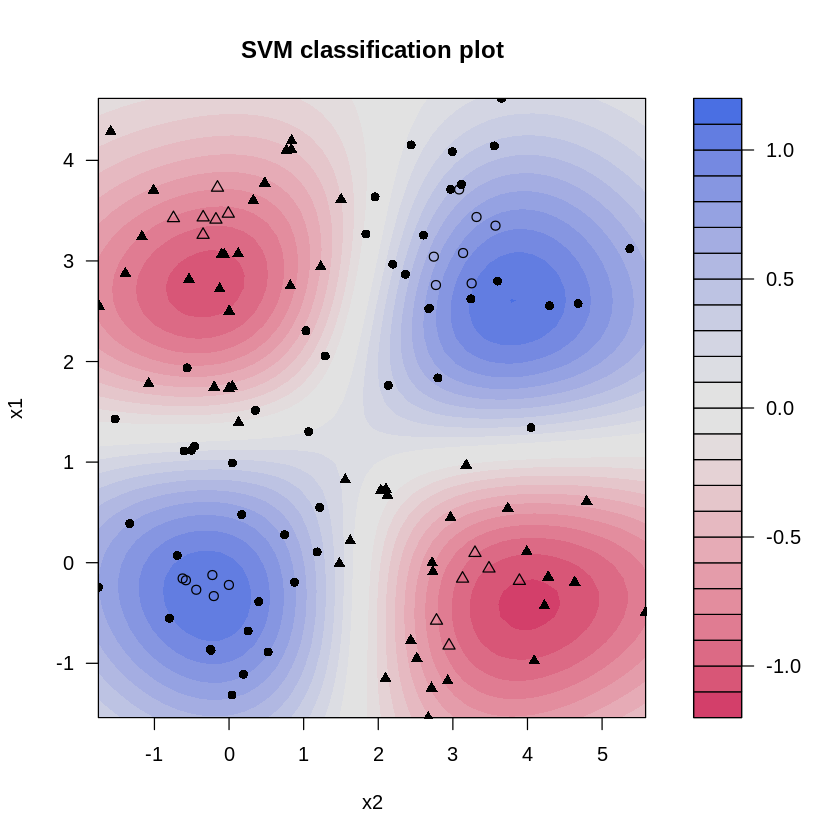

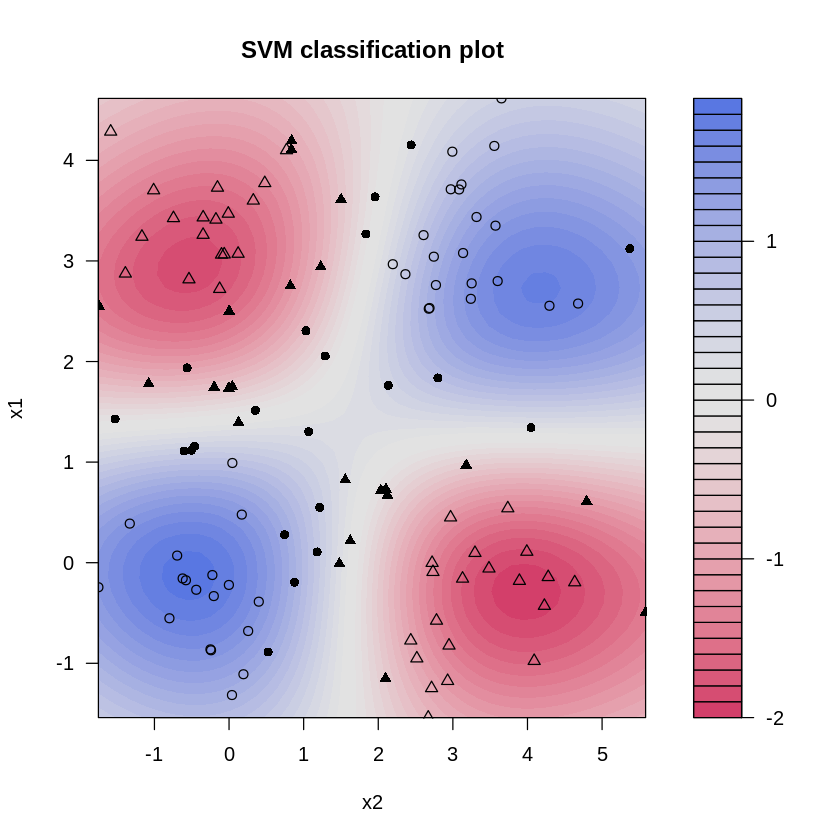

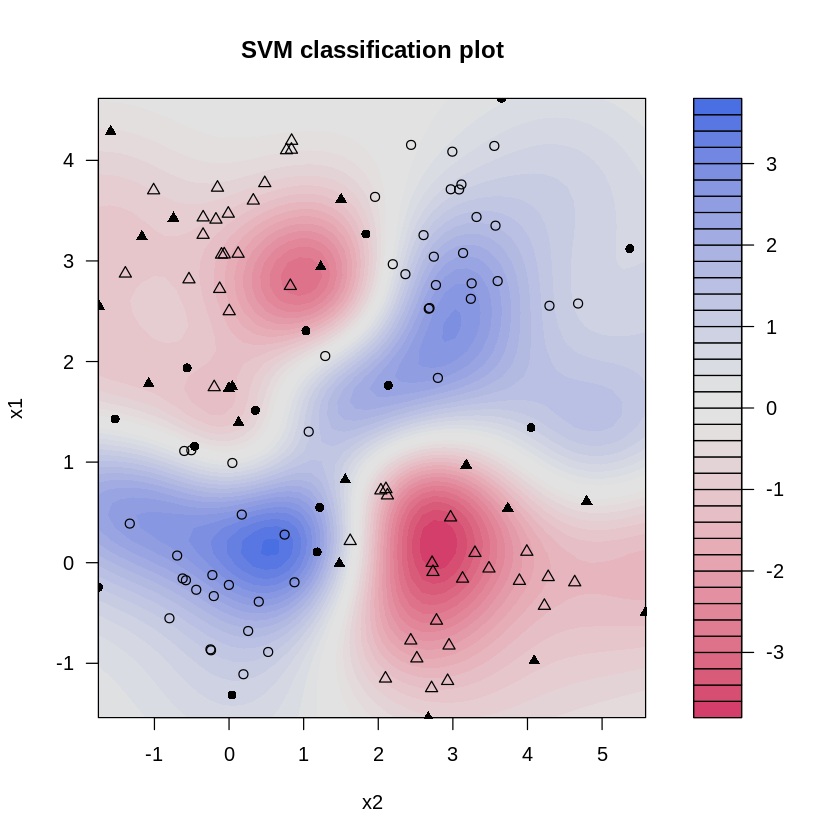

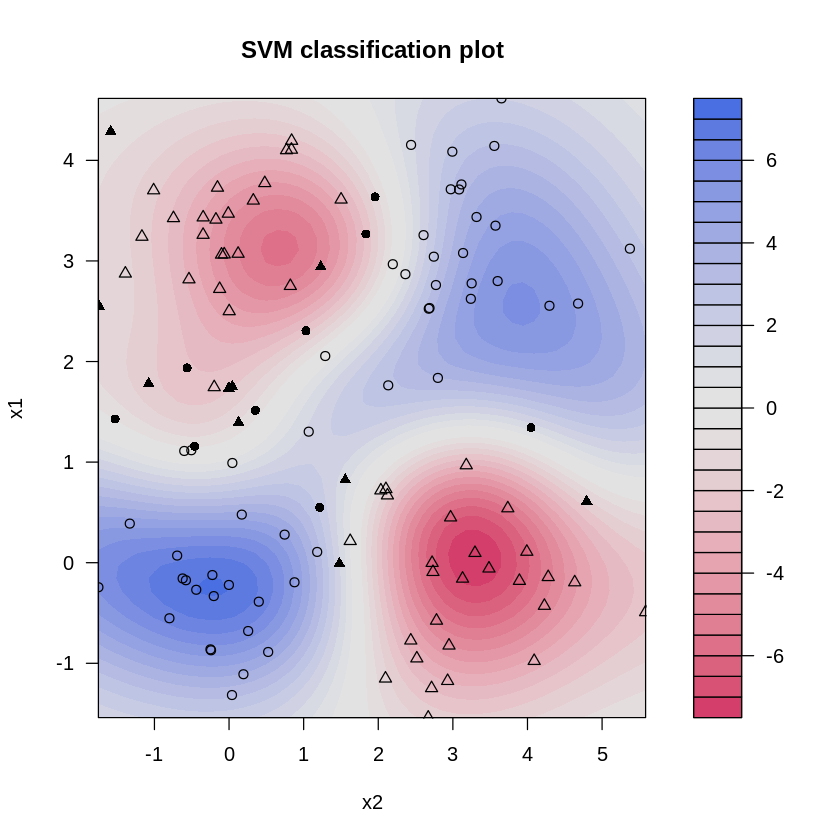

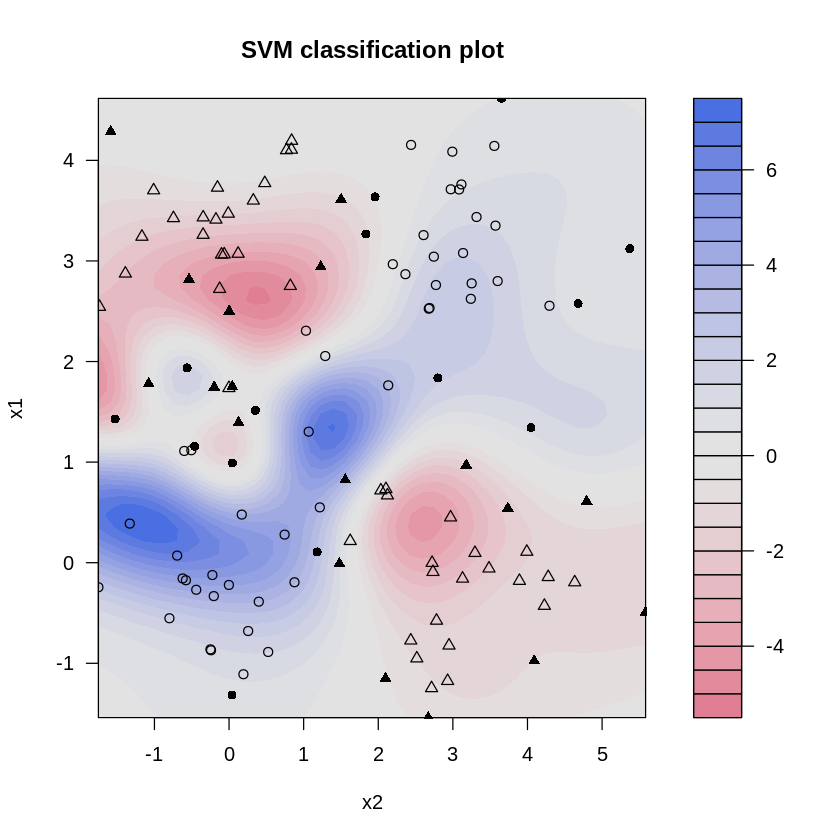

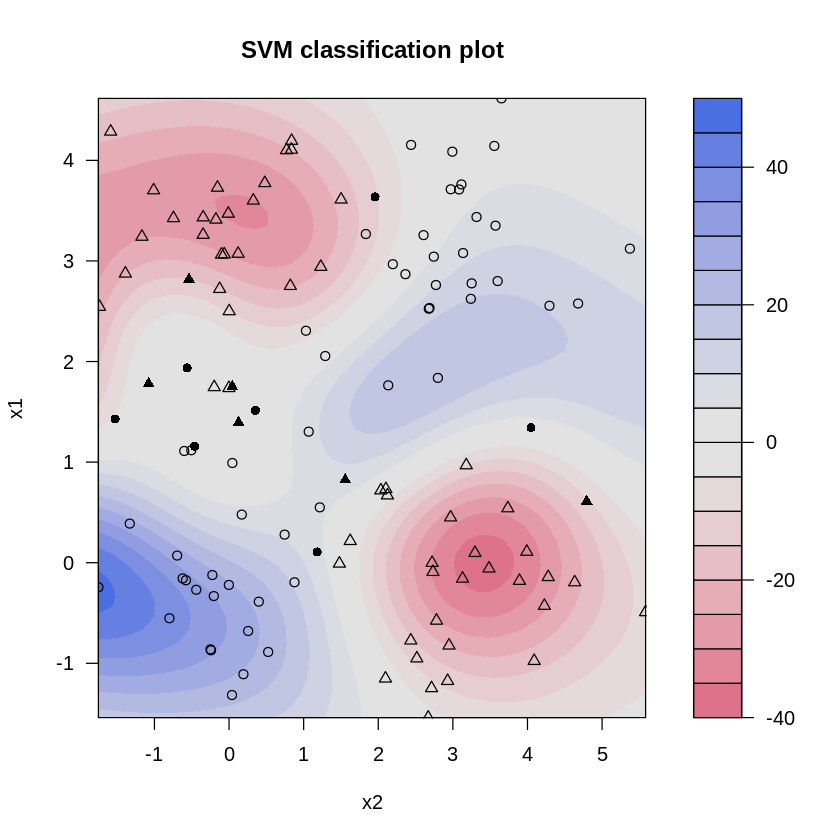

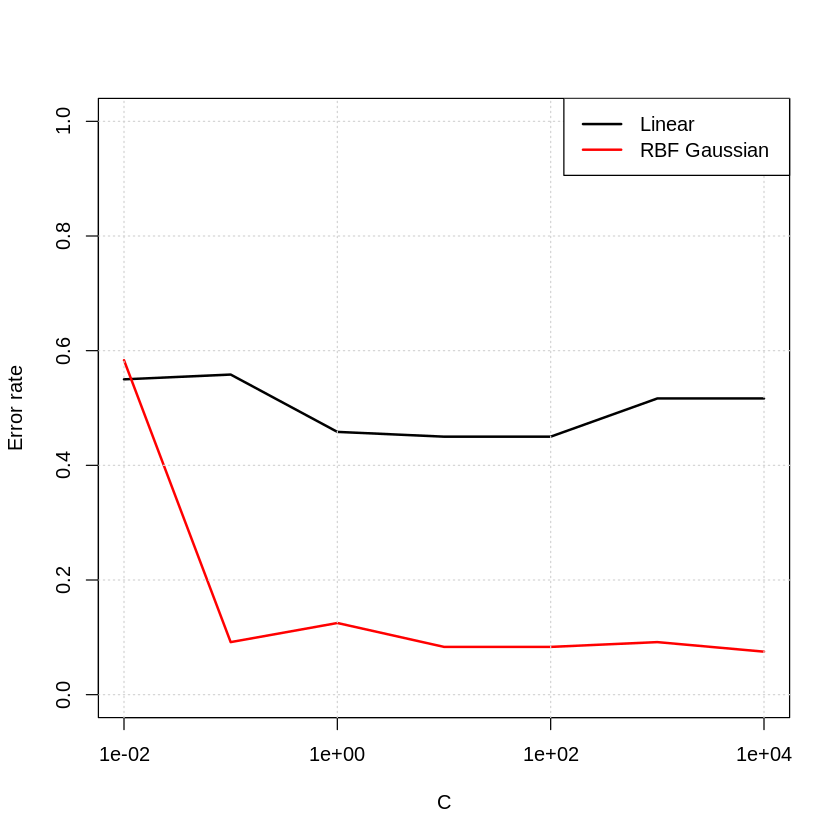

In [10]:

# altering C, but with automatic choice of sigma
errrbf <- numeric(length(CList))
for (i in seq(length(CList))) {
	svp <- ksvm(nlx,nly,type="C-svc",kernel='rbf', C=CList[i], cross=5)

	plot(svp,data=nlx)
	errrbf[i] <- cross(svp)
}

plot(CList,errlin,type='l',log="x",ylim=c(0,1),xlab="C",ylab="Error rate",col=1,lwd=2)
lines(CList,errrbf,col=2,lwd=2)
grid()
legend("topright",c('Linear','RBF Gaussian'),lwd=2,col=c(1,2))



C= 0.01.............
C= 0.1.............
C= 1.............
C= 10.............
C= 100.............
C= 1000.............
C= 10000.............


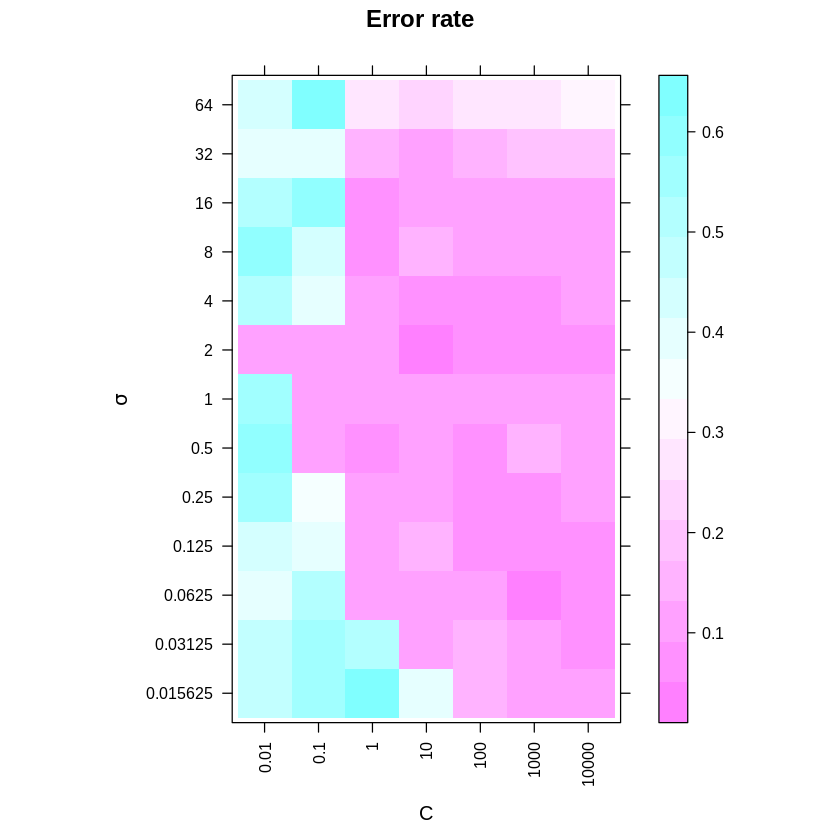

In [11]:


### Altering C and Sigma
nc <- length(CList)
sigmaList <- 2^seq(-6,6)
nsigma <- length(sigmaList)
err <- matrix(0,nrow=nc,ncol=nsigma)
for (i in seq(nc)) {
	C <- CList[i]
	cat('C=',C)
	for (j in seq(nsigma)) {
		cat('.')
		svp <- ksvm(nlx,nly,type="C-svc",kernel='rbf',kpar=list(sigma=sigmaList[j]),C=C,cross=3)
		err[i,j] <- cross(svp)
	}
	cat('\n')
}
# Visualize
library(lattice)
dimnames(err) <- list(C=CList,sigma=sigmaList)
levelplot(err,scales=list(x=list(rot=90)),xlab="C",ylab=expression(sigma),main="Error rate")





In [12]:
# install and load nn package
install.packages("neuralnet")
library(neuralnet)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [13]:
#NN only work with formula, so we need to cbind xtrain and ytrain
trainData = cbind(xtrain, ytrain)
colnames(trainData)= c("x1", "x2", "y")

trainData[1:3,]

x1,x2,y
-0.5428288,-1.056368,1
0.7581632,2.701891,1
1.4054118,2.946003,-1


In [26]:
# train a neuralnet
nnModel = neuralnet(formula="y ~ x1+x2", data=trainData, hidden=c(5,3), linear.output=FALSE) 
#linear.output = TRUE --> regression
#linear.output = FALSE --> classification (apply 'logistic' activation as default)


# General summary
summary(nnModel)

# Plot the network
plot(nnModel)

                    Length Class      Mode    
call                  5    -none-     call    
response            120    -none-     numeric 
covariate           240    -none-     numeric 
model.list            2    -none-     list    
err.fct               1    -none-     function
act.fct               1    -none-     function
linear.output         1    -none-     logical 
data                  3    data.frame list    
net.result            1    -none-     list    
weights               1    -none-     list    
startweights          1    -none-     list    
generalized.weights   1    -none-     list    
result.matrix        40    -none-     numeric 

In [27]:
#### Let's predict our test set
nnCompute = compute(nnModel, xtest)
#nnCompute$net.result

prediction = nnCompute$net.result

prediction[prediction < 0.5] = -1
prediction[prediction >= 0.5] = 1

CM = as.matrix(table(Actual = ytest, Predicted = prediction))
TPR = CM[2,2] / (CM[2,2] + CM[2,1])
TNR = CM[1,1] / (CM[1,1] + CM[1,2])
ACCNorm = mean(c(TPR, TNR))
CM
ACCNorm

      Predicted
Actual -1  1
    -1 15  0
    1   1 14

[1] 0.9666666667

In [56]:
nlTrainData = cbind(nlxTrain, nlyTrain)
colnames(nlTrainData)= c("x1", "x2", "y")

# train a neuralnet
nnModel = neuralnet(formula="y ~ x1+x2", data=nlTrainData, hidden=c(10,10), linear.output=FALSE) 
#linear.output = TRUE --> regression
#linear.output = FALSE --> classification (apply 'logistic' activation as default)

nnCompute = compute(nnModel, nlxTest)
#nnCompute

prediction = nnCompute$net.result

prediction[prediction < 0.5] = -1
prediction[prediction >= 0.5] = 1

CM = as.matrix(table(Actual = nlyTest, Predicted = prediction))
TPR = CM[2,2] / (CM[2,2] + CM[2,1])
TNR = CM[1,1] / (CM[1,1] + CM[1,2])
ACCNorm = mean(c(TPR, TNR))

CM
ACCNorm

      Predicted
Actual -1  1
    -1  9  0
    1   2 13

[1] 0.9333333333

In [74]:
train.data = read.csv("occupancy_dataTrain.txt")
test.data = read.csv("occupancy_dataTest.txt")

#train.data
#train.data[7]

#as.matrix(train.data[2:6])

svp <- ksvm(as.matrix(train.data[2:6]), test.data$Occupancy*2-1, type = "C-svc", kernel="vanilladot", C=100, scalled=c())
ypred = predict(svp, as.matrix(test.data[2:6]))
as.matrix(table(Actual = test.data$Occupancy*2-1, Predicted = ypred))

# Compute accuracy
sum(ypred==test.data$Occupancy*2-1)/nrow(test.data)
# Compute at the prediction scores
ypredscore = predict(svp,as.matrix(test.data[2:6]),type="decision")
# Check that the predicted labels are the signs of the scores
table(ypredscore > 0,test.data$Occupancy > 0)
#svp
#attributes(svp)

#coef(svp)
#alphaindex(svp)
#b(svp)

 Setting default kernel parameters  


      Predicted
Actual   -1    1
    -1 7961  146
    1     5 2696

[1] 0.9860288675

       
        FALSE TRUE
  FALSE  7961    5
  TRUE    146 2696

In [67]:
# Use the built-in function to pretty-plot the classifier
plot(svp,data=as.matrix(train.data[2:6]))

ERROR: Error in .local(object, ...): test vector does not match model !


In [ ]:
#train.data
# train a neuralnet
nnModel = neuralnet(formula="Occupancy ~ Temperature + Humidity + Light + CO2 + HumidityRatio", data=train.data, hidden=c(10,10), linear.output=FALSE) 
#linear.output = TRUE --> regression
#linear.output = FALSE --> classification (apply 'logistic' activation as default)

nnCompute = compute(nnModel, test.data)
#nnCompute